<a href="https://colab.research.google.com/github/keerthana6126/FMML_Projects_and_labs/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load dataset (option A: direct URL) - replace with correct CSV path if needed
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
# Easiest: manually download, unzip & upload files to Colab, then read student-mat.csv
# For demo, load a small sample or upload file via Colab UI:
df = pd.read_csv('/content/student-mat.csv', sep=';')  # upload this file


In [28]:
# Preprocess: make target binary (pass/fail) from final grade G3
df['pass'] = (df['G3'] >= 10).astype(int)
X = df.drop(columns=['G1','G2','G3','pass'])
y = df['pass']

# Simple column type split
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_proc = preprocessor.fit_transform(X)

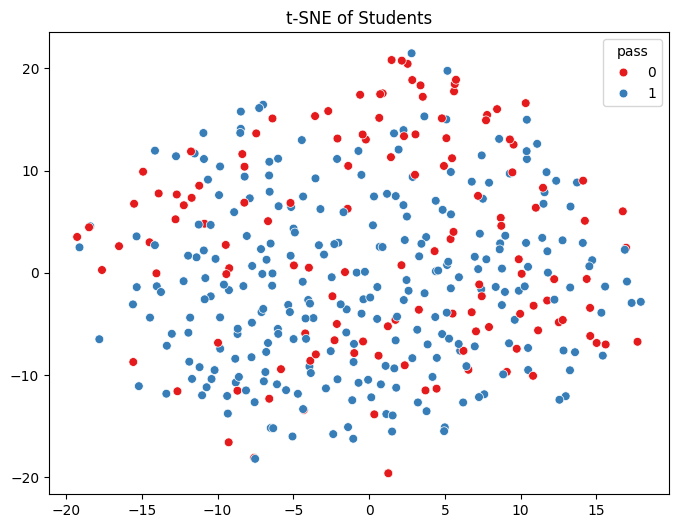

In [29]:
# PCA -> t-SNE visualization
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_proc)
tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set1', s=40)
plt.title("t-SNE of Students")
plt.show()


In [30]:
# Train/Test & Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.67      0.15      0.24        27
           1       0.68      0.96      0.80        52

    accuracy                           0.68        79
   macro avg       0.68      0.55      0.52        79
weighted avg       0.68      0.68      0.61        79



In [31]:
# Save model (optional)
import joblib
joblib.dump({'model':clf,'preprocessor':preprocessor}, '/content/student_model.pkl')


['/content/student_model.pkl']